In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Data Sets/placementAU.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
X = df.drop(columns=['package'])
y = df['package']

In [7]:
# Select all float64 columns
int_feature = X.select_dtypes(include=["float64"]).columns

# Print the total number of float features
print("Total number of float features:", len(int_feature))  

# Print the names of the float features
print("Float feature names:", int_feature)

Total number of float features: 1
Float feature names: Index(['cgpa'], dtype='object')


In [8]:
# X = df.drop(columns=['package'])
# y = df['package']

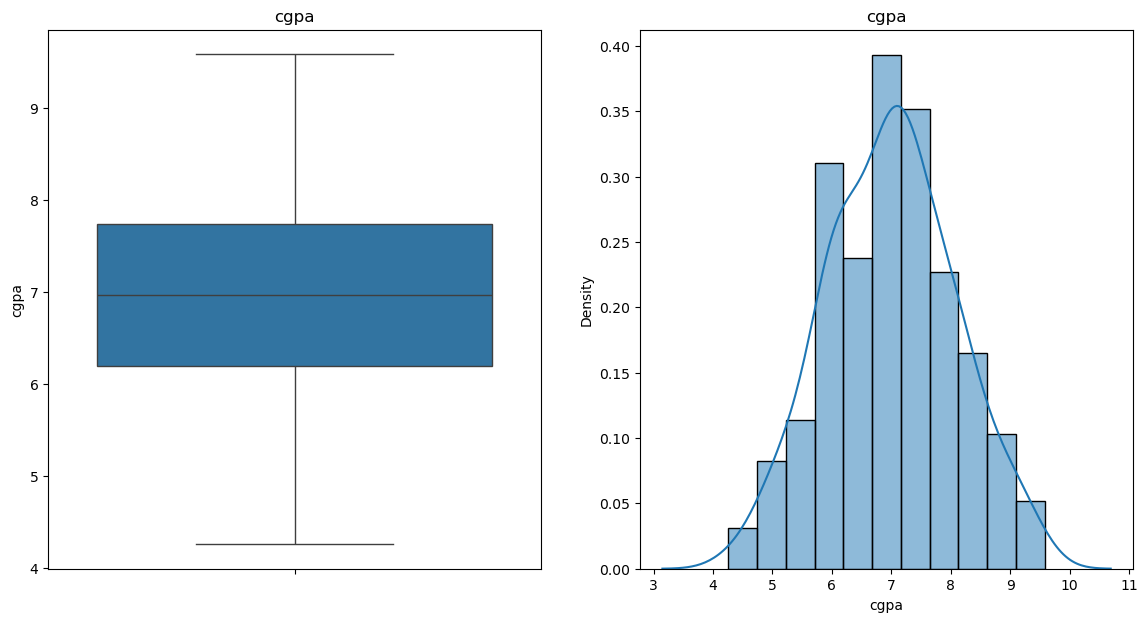

In [9]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(X[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(X[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [10]:
# Create a copy of the original DataFrame
new_df_cap = X.copy()

# Loop through each float feature
for col in int_feature:
    # Calculate the 25th and 75th percentiles
    percentile25 = X[col].quantile(0.25)
    percentile75 = X[col].quantile(0.75)

    # Calculate IQR
    iqr = percentile75 - percentile25

    # Calculate upper and lower limits
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Apply capping for outliers
    new_df_cap[col] = np.where(
        new_df_cap[col] > upper_limit, 
        upper_limit,  # Cap the value to upper_limit if it's higher
        np.where(
            new_df_cap[col] < lower_limit, 
            lower_limit,  # Cap the value to lower_limit if it's lower
            new_df_cap[col]  # Otherwise, leave the value unchanged
        )
    )

print("Outliers capped using IQR method.")

Outliers capped using IQR method.


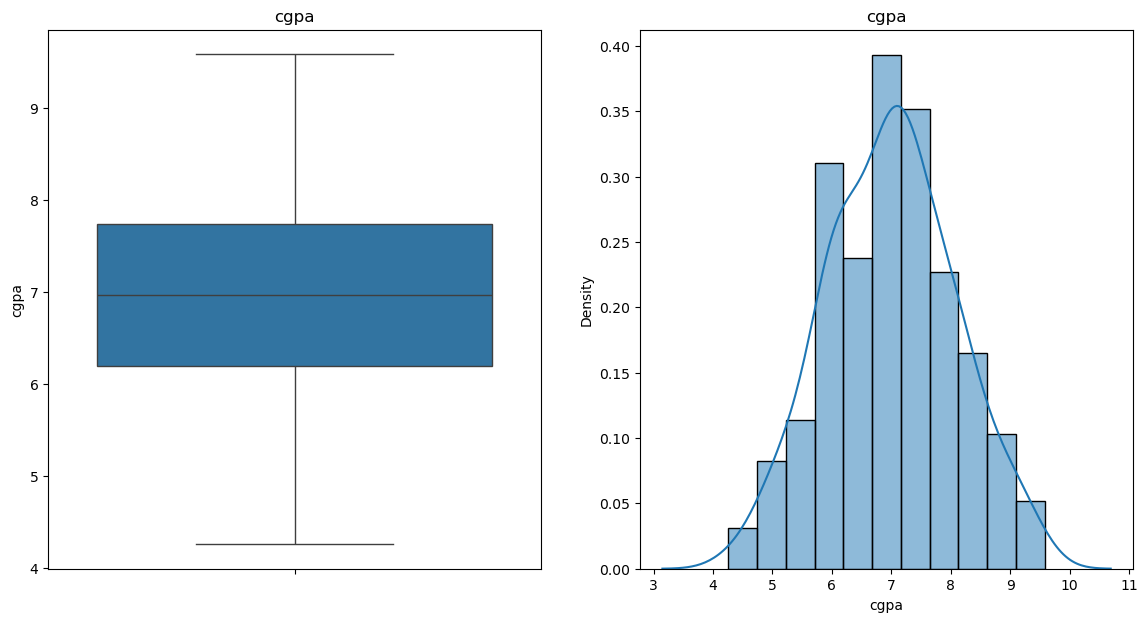

In [11]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(new_df_cap[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(new_df_cap[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [12]:
# X = df.drop(columns=['package'])
# y = df['package']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
# # Scaling the features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [18]:
# Defining the KNN regressor model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)

# Training the model
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

In [19]:
# Evaluating the model using R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

R² Score: 0.7247
